# Import

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx

from bayesian_network import BayesianNetwork

# Prepare Data

| 英語 | 日本語 |
|------|--------|
| MedInc | 中央所得 |
| HouseAge | 住宅年数 |
| AveRooms | 平均部屋数 |
| AveBedrms | 平均寝室数 |
| Population | 人口 |
| AveOccup | 平均居住者数 |
| Latitude | 緯度 |
| Longitude | 経度 |
| MedHouseVal | 中央住宅価値 |

In [3]:
df_original = pd.read_csv("./data/california.csv")
df_original

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [4]:
bin_df = pd.DataFrame([])
n_bin = 3
for name in df_original.columns:
    bin_df[name], _ = pd.cut(df_original[name], n_bin, labels=np.arange(n_bin)+1, retbins=True)
bin_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2,3,1,1,1,1,2,1,3
1,2,2,1,1,1,1,2,1,3
2,2,3,1,1,1,1,2,1,3
3,2,3,1,1,1,1,2,1,3
4,1,3,1,1,1,1,2,1,3


# Main

In [5]:
bayesian_network = BayesianNetwork(bin_df=bin_df, n_dim_total=4)
connect_df_dict = bayesian_network.run()

==================== DIM0 ====================
---------- COLECT ----------
MedInc , HouseAge | [] -> True [0.00]
MedInc , AveRooms | [] -> False [0.99]
MedInc , AveBedrms | [] -> False [1.00]
MedInc , Population | [] -> False [0.20]
MedInc , AveOccup | [] -> True [0.00]
MedInc , Latitude | [] -> True [0.00]
MedInc , Longitude | [] -> True [0.00]
MedInc , MedHouseVal | [] -> True [0.00]
HouseAge , AveRooms | [] -> False [0.66]
HouseAge , AveBedrms | [] -> False [0.88]
HouseAge , Population | [] -> True [0.00]
HouseAge , AveOccup | [] -> False [0.56]
HouseAge , Latitude | [] -> True [0.00]
HouseAge , Longitude | [] -> True [0.00]
HouseAge , MedHouseVal | [] -> True [0.00]
AveRooms , AveBedrms | [] -> True [0.00]
AveRooms , Population | [] -> False [1.00]
AveRooms , AveOccup | [] -> False [1.00]
AveRooms , Latitude | [] -> True [0.00]
AveRooms , Longitude | [] -> False [0.90]
AveRooms , MedHouseVal | [] -> False [0.95]
AveBedrms , Population | [] -> False [1.00]
AveBedrms , AveOccup | []

# Result

## Funcs

In [6]:
def highlight_true(val):
    background_color = 'green' if val == 1 else ''
    return f'background-color: {background_color}'

In [7]:
def viz_network(connect_df: pd.DataFrame, title: str):
    df_columns = connect_df.columns.to_numpy()
    
    connect_pairs = []
    for i, col1 in enumerate(df_columns[:-2]):
        for j in range(i + 1, len(df_columns)):
            col2 = df_columns[j]
            if connect_df.loc[col1, col2]:
                connect_pairs.append((col1, col2))

    G = nx.DiGraph()
    G.add_nodes_from(df_columns)
    G.add_edges_from(connect_pairs)

    pos = nx.circular_layout(G)

    plt.figure(figsize=(10, 7))
    nx.draw_networkx(G, pos, with_labels=True, arrows=False, node_size=3000, alpha=0.4, font_weight="bold")
    plt.title(title)
    plt.axis('off')

In [8]:
df_columns = bin_df.columns.to_numpy()
connect_init_df = pd.DataFrame(data=False, index=df_columns, columns=df_columns, dtype=bool)

for i, col1 in enumerate(df_columns[:-1]):
    for j in range(i + 1, len(df_columns)):
        col2 = df_columns[j]
        connect_init_df.loc[col1, col2] = True

In [9]:
connect_dfs.append(connect_init_df)

NameError: name 'connect_dfs' is not defined

In [ ]:
n_dim_total = 4

In [ ]:
for n_dim in range(n_dim_total+1):
    
    print(f"==================== DIM{n_dim} ====================")
    disconnect_infos = []
    print()
    
    print(f"-------------------- COLECT --------------------")
    collect_disconnect_infos(n_dim, disconnect_infos, connect_dfs[-1], connect_checker)
    print()
    
    print(f"-------------------- APPLY --------------------")
    connect_dfs.append( connect_dfs[-1].copy() )
    apply_disconnect_infos(n_dim, disconnect_infos, connect_dfs[-1])
    print()
    print()

## Table

In [10]:
for label, connect_df in connect_df_dict.items():
    print(f"=========================== {label} ===========================")
    display(connect_df.astype(int).style.applymap(highlight_true))
    print()

=========================== Init ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,1,1,1,1,1,1,1
HouseAge,0,0,1,1,1,1,1,1,1
AveRooms,0,0,0,1,1,1,1,1,1
AveBedrms,0,0,0,0,1,1,1,1,1
Population,0,0,0,0,0,1,1,1,1
AveOccup,0,0,0,0,0,0,1,1,1
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level0 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,0,1,1,1,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level1 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,0,1,1,1,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level2 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,0,1,1,0,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level3 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,0,1,0,0,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0



=========================== Level4 ===========================


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,0,1,0,0,0,1,0,0,1
HouseAge,0,0,0,0,1,0,1,1,1
AveRooms,0,0,0,1,0,0,1,0,0
AveBedrms,0,0,0,0,0,0,1,0,0
Population,0,0,0,0,0,0,0,0,0
AveOccup,0,0,0,0,0,0,0,0,0
Latitude,0,0,0,0,0,0,0,1,1
Longitude,0,0,0,0,0,0,0,0,1
MedHouseVal,0,0,0,0,0,0,0,0,0


## Graph

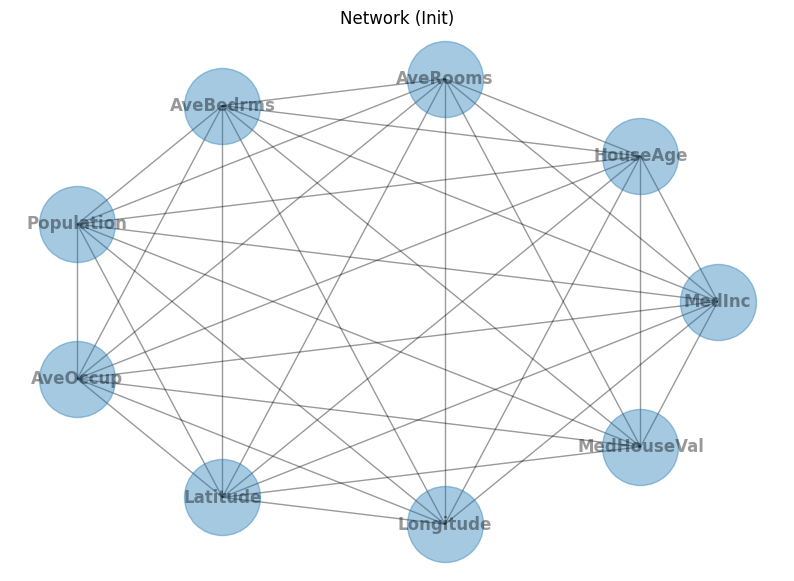

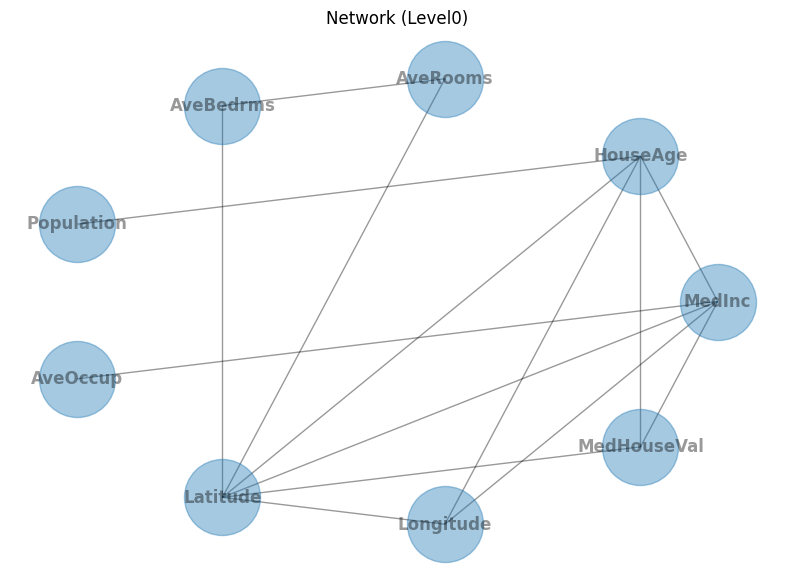

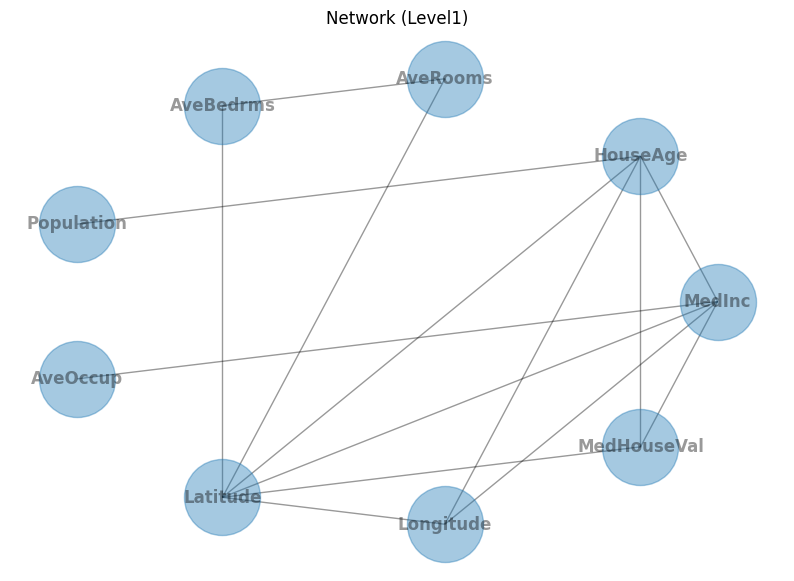

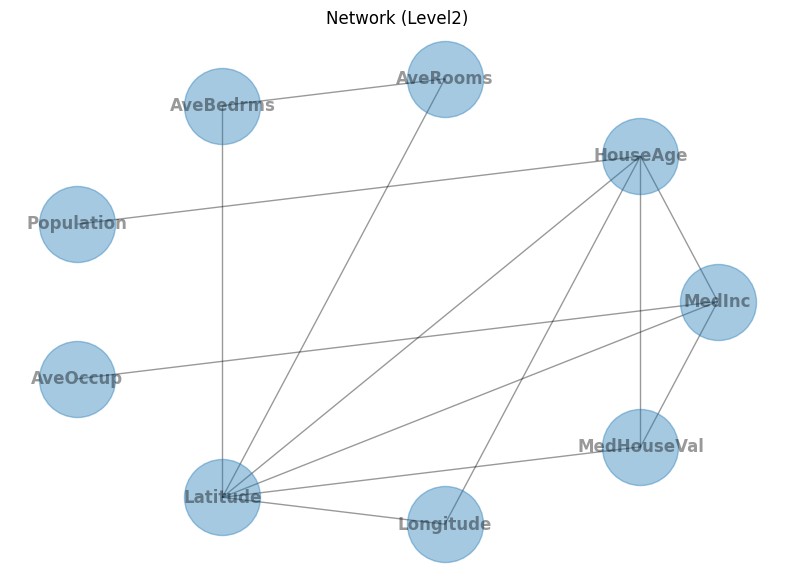

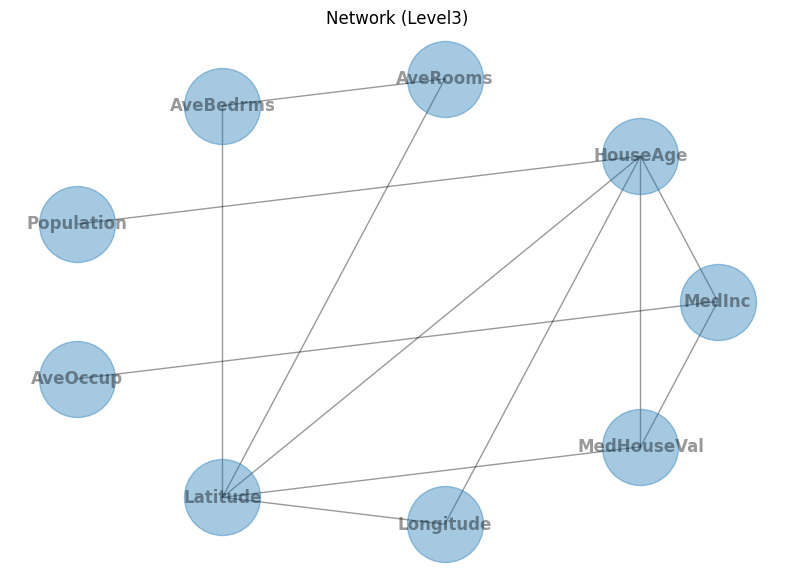

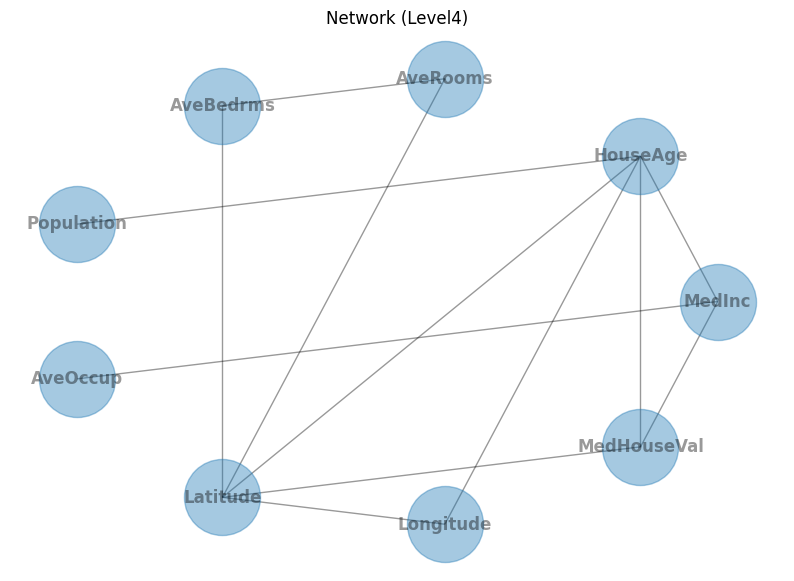

In [11]:
for label, connect_df in connect_df_dict.items():
    viz_network(connect_df, f"Network ({label})")